In [68]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [69]:
df_data = pd.read_csv('StudentsPerformance.xls')
df_data 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [70]:
df_data_num = df_data.select_dtypes(include=['int64', 'float64'])
df_data_num

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [71]:
nulo = 0

for column in df_data.columns:
    if df_data[column].isna().any():
        print(column)
        nulo += 1
    else:
        print (f"No hay dato faltante para la columna: {column}")

if nulo == 0:
    print("\nNo hay datos faltantes en el DataSet")

No hay dato faltante para la columna: gender
No hay dato faltante para la columna: race/ethnicity
No hay dato faltante para la columna: parental level of education
No hay dato faltante para la columna: lunch
No hay dato faltante para la columna: test preparation course
No hay dato faltante para la columna: math score
No hay dato faltante para la columna: reading score
No hay dato faltante para la columna: writing score

No hay datos faltantes en el DataSet


In [72]:
tendecy_central = []

for column in df_data_num.columns:

    statistical_descriptor = df_data_num[column].describe()
    Q1 = statistical_descriptor['25%']
    Q3 = statistical_descriptor['75%']
    IQR = Q3 - Q1

    row = {
        'Variable': column,
        'promedio': statistical_descriptor['mean'],
        'mediana': statistical_descriptor['50%'],
        'Cuartil 1': Q1,
        'Cuartil 3': Q3,
        'Rango intercuartil': IQR
    }

    tendecy_central.append(row)
tendecy_central_df = pd.DataFrame(tendecy_central)
tendecy_central_df

,Variable,promedio,mediana,Cuartil 1,Cuartil 3,Rango intercuartil
0,math score,66.089,66.0,57.00,77.0,20.00
1,reading score,69.169,70.0,59.00,79.0,20.00
2,writing score,68.054,69.0,57.75,79.0,21.25


In [73]:
for column in df_data_num.columns:

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print (f"Limite inferior para la columna {column}: {lower_bound}")
    print (f"Limite superior para la columna {column}: {upper_bound}")

    outliers = df_data_num[(df_data_num[column] < lower_bound) | (df_data_num[column] > upper_bound)]
    print (f"Cantidad de outliers en la columna {column}: {outliers.shape[0]}\n")


Limite inferior para la columna math score: 25.875
Limite superior para la columna math score: 110.875
Cantidad de outliers en la columna math score: 7

Limite inferior para la columna reading score: 25.875
Limite superior para la columna reading score: 110.875
Cantidad de outliers en la columna reading score: 4

Limite inferior para la columna writing score: 25.875
Limite superior para la columna writing score: 110.875
Cantidad de outliers en la columna writing score: 5



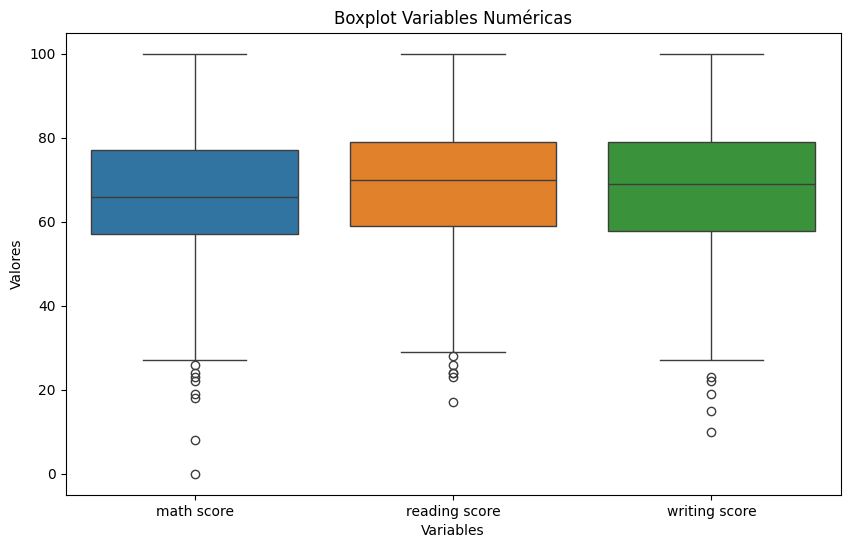

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_data_num)
plt.title('Boxplot Variables Numéricas')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.show()

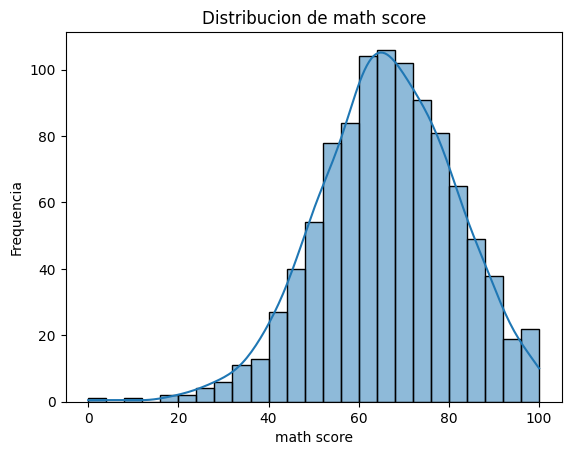

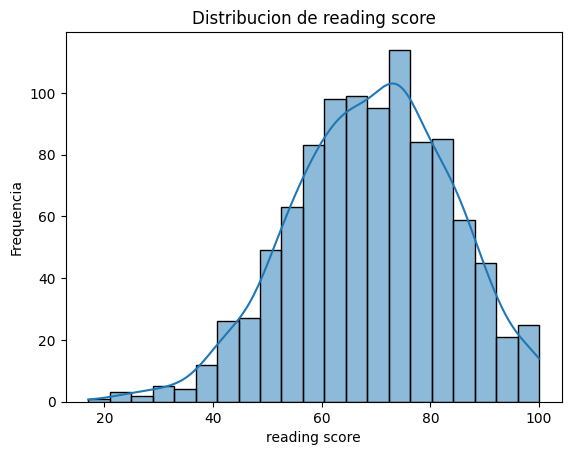

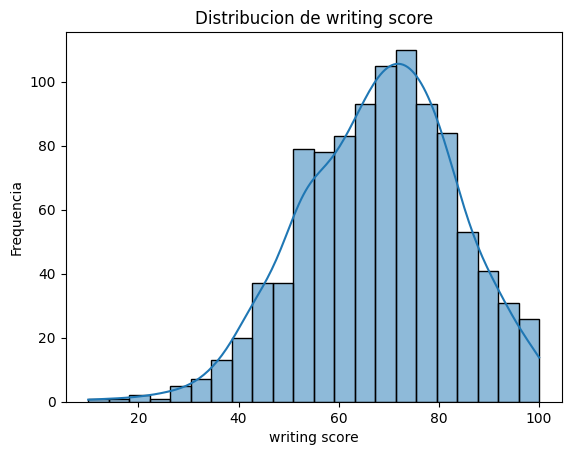

In [77]:
for column in df_data_num.columns:
    plt.figure()
    sns.histplot(df_data_num[column], kde=True)
    plt.title(f'Distribucion de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequencia')
    plt.show()  
